✅ Libraries imported successfully!
✅ Loaded 500 records
📊 Columns: ['customer name', 'customer e-mail', 'country', 'gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']
⚠️ No 'price' column found. Using 'car purchase amount' as target.

🎯 Target Column: 'car purchase amount'
   Data Type: float64
   Missing Values: 0
   Range: 9,000.00 - 80,000.00

🔧 Engineering features...
   ✅ Encoded customer name: 498 categories
   ✅ Encoded customer e-mail: 500 categories
   ✅ Encoded country: 211 categories

✅ Feature Engineering Complete:
   Features (X): (500, 8)
   Target (y): (500,)

📋 Feature Names:
   1. customer name
   2. customer e-mail
   3. country
   4. gender
   5. age
   6. annual Salary
   7. credit card debt
   8. net worth

📊 Data Split:
   Training Set: 400 samples (80.0%)
   Test Set: 100 samples (20.0%)

   Training Features Shape: (400, 8)
   Test Features Shape: (100, 8)

📏 Scaling features...

✅ Features scaled using StandardScaler
   Sca

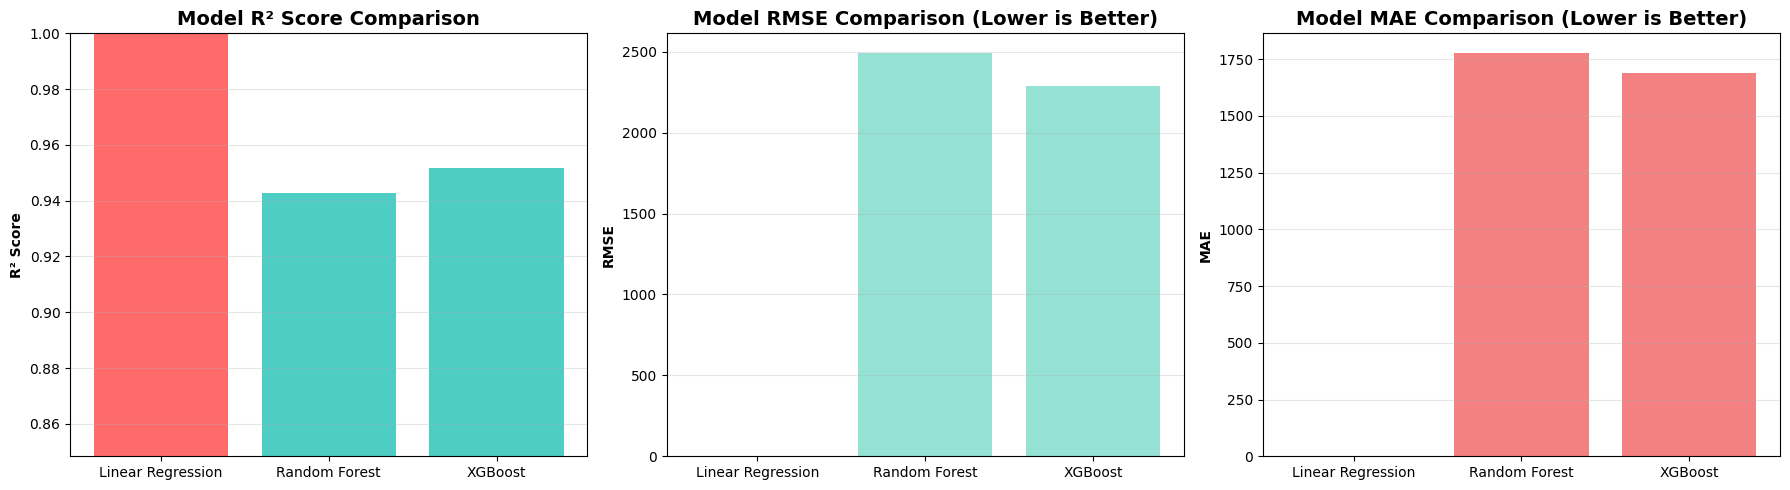


📊 Analyzing feature importance...
💾 Best model (Linear Regression) saved to ../models

✅ Model artifacts saved to '../models/' directory

📊 FINAL MODEL COMPARISON SUMMARY

                   train_r2  train_rmse  train_mae  test_r2  test_rmse   test_mae
Linear Regression    1.0000      1.4745     1.1758   1.0000     1.4720     1.1648
Random Forest        0.9892   1126.8230   770.7664   0.9426  2488.9312  1775.1426
XGBoost              1.0000      6.6809     4.5718   0.9516  2284.9748  1688.1712

🏆 BEST MODEL RECOMMENDATION

✅ Deploy: Linear Regression
✅ Test R² Score: 1.0000
✅ Test RMSE: $1.47
✅ Test MAE: $1.16

💡 Interpretation:
   The Linear Regression explains 100.0% 
   of the variance in car purchase amount.
   On average, predictions are off by $1.16.

✅ MODELING COMPLETE - Ready for deployment!


In [3]:
# ===== CELL 1: Setup =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../src')
from feature_engineering import FeatureEngineer
from model_training import ModelTrainer

print("✅ Libraries imported successfully!")

# ===== CELL 2: Load Processed Data =====
try:
    df = pd.read_csv('../data/processed/car_sales_clean.csv')
    print(f"✅ Loaded {len(df):,} records")
    print(f"📊 Columns: {df.columns.tolist()}")
except FileNotFoundError:
    print("❌ ERROR: Processed data not found!")
    print("   Please run 01_eda.ipynb first to generate cleaned data.")
    raise

# ===== CELL 3: Identify Target Column =====
# Find price column (case-insensitive)
price_cols = [col for col in df.columns if 'price' in col.lower()]
if price_cols:
    target_col = price_cols[0]
else:
    # Use last column as target if no price column found
    target_col = df.columns[-1]
    print(f"⚠️ No 'price' column found. Using '{target_col}' as target.")

print(f"\n🎯 Target Column: '{target_col}'")
print(f"   Data Type: {df[target_col].dtype}")
print(f"   Missing Values: {df[target_col].isnull().sum()}")
print(f"   Range: {df[target_col].min():,.2f} - {df[target_col].max():,.2f}")

# ===== CELL 4: Feature Engineering =====
engineer = FeatureEngineer()
X, y = engineer.engineer_features(df, target_col)

print(f"\n✅ Feature Engineering Complete:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"\n📋 Feature Names:")
for i, feature in enumerate(engineer.feature_names, 1):
    print(f"   {i}. {feature}")

# ===== CELL 5: Train-Test Split =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n📊 Data Split:")
print(f"   Training Set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Test Set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\n   Training Features Shape: {X_train.shape}")
print(f"   Test Features Shape: {X_test.shape}")

# ===== CELL 6: Scale Features =====
X_train_scaled, X_test_scaled = engineer.scale_features(X_train, X_test)

print("\n✅ Features scaled using StandardScaler")
print(f"   Scaled Training Set Shape: {X_train_scaled.shape}")
print(f"   Scaled Test Set Shape: {X_test_scaled.shape}")

# Save preprocessing artifacts
engineer.save_artifacts('../models')

# ===== CELL 7: Train Models =====
print("\n" + "="*70)
print("🚀 STARTING MODEL TRAINING")
print("="*70)

trainer = ModelTrainer()
results = trainer.train_all_models(X_train_scaled, X_test_scaled, y_train, y_test)

# ===== CELL 8: Visualize Model Comparison =====
print("\n📊 Creating model comparison visualizations...")
trainer.plot_model_comparison('../visualizations/model_comparison.png')

# ===== CELL 9: Feature Importance =====
print("\n📊 Analyzing feature importance...")
trainer.plot_feature_importance(engineer.feature_names, '../visualizations/feature_importance.png')

# ===== CELL 10: Save Best Model =====
trainer.save_best_model('../models')

print("\n✅ Model artifacts saved to '../models/' directory")

# ===== CELL 11: Results Summary =====
print("\n" + "="*80)
print("📊 FINAL MODEL COMPARISON SUMMARY")
print("="*80)

results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("\n" + results_df.to_string())

print("\n" + "="*80)
print("🏆 BEST MODEL RECOMMENDATION")
print("="*80)
print(f"\n✅ Deploy: {trainer.best_model_name}")
print(f"✅ Test R² Score: {results[trainer.best_model_name]['test_r2']:.4f}")
print(f"✅ Test RMSE: ${results[trainer.best_model_name]['test_rmse']:,.2f}")
print(f"✅ Test MAE: ${results[trainer.best_model_name]['test_mae']:,.2f}")

print(f"\n💡 Interpretation:")
print(f"   The {trainer.best_model_name} explains {results[trainer.best_model_name]['test_r2']*100:.1f}% ")
print(f"   of the variance in {target_col}.")
print(f"   On average, predictions are off by ${results[trainer.best_model_name]['test_mae']:,.2f}.")

print("\n" + "="*80)
print("✅ MODELING COMPLETE - Ready for deployment!")
print("="*80)